# Full Bachelor code

In [1]:
from array import *
from random import *
from scipy import *
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import numpy as np
import time
import random

%matplotlib inline

('Time taken', 0.07141685485839844)


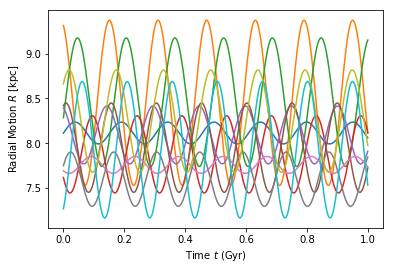

In [4]:
def epicycle(stars,Time,iterations):
    '''DESCRIPTION: This function outputs the motion of stars using the epicycle approximation.
    The radial- and vertical motions show oscillation around the stars guding centre
    The Azimuthal motion shows the stars motion relative to the center of the box, while the box itself
    moves with a constant angular velocity 30 kpc/Gyr around the galactic centre. The box has periodic 
    boundaries in the azimuth and outflowing boundaries in radial- and vertical directions.'''
    
    t1 = time.time()
    
    '''Lists needed'''
    timelist = [] #timelist over number of iterations
    Rdeltaphilist = [] 
    Rlist = [] 
    zlist = []
    
    '''Lists for motions in Cartesian Coordinates'''
    xlist = []
    ylist = []
    zcartlist = []
    
    '''List for Velocity'''
    velocitylist = []
    
    '''lists for mean oscillaition magnitudes'''
    Rmeanlist, Rdeltaphimeanlist, zmeanlist = [], [], []
    
    '''Defining the box's boundaries'''
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*10/nu))
    
    '''Distance in matrix'''
    for t in np.linspace(0,Time,iterations):
        R = R_0 + a*np.sin(kappa*t + varphi)
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        deltaphi = np.mod((phi - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min
        vel = R*(omega_0 - ((2*omega_0)/R_0)*a*np.sin(kappa*t + varphi))
        velocitylist.append(vel)

        '''Euclidean space'''
        x = R*np.cos(deltaphi) - R_0 #Take away distance to box
        y = R*np.sin(deltaphi)
        z = z
        
        xlist.append(x)
        ylist.append(y)
        zcartlist.append(z)
        
        '''Append values to lists'''
        timelist.append(t)
        Rlist.append(R)
        Rdeltaphilist.append(Rdeltaphi)
        zlist.append(z)
     
    '''Mean oscillation magnitudes'''
    meanradialposition = [k for k in zip(*Rlist)]
    for i in meanradialposition:
        Rmeanlist.append(max(i) - min(i))
    #print(np.mean(Rmeanlist))
    
    meanazimuthalposition = [k for k in zip(*Rdeltaphilist)]
    for i in meanazimuthalposition:
        Rdeltaphimeanlist.append(max(i) - min(i))
    #print(np.mean(Rdeltaphimeanlist))
    
    meanverticalposition = [k for k in zip(*zlist)]
    for i in meanverticalposition:
        zmeanlist.append(max(i) - min(i))
    #print(np.mean(zmeanlist))
      
    '''---Plotting motions---'''
    
    '''Radial'''
    plt.ylabel(r'Radial Motion $R$ [kpc]')
    plt.xlabel(r'Time $t$ (Gyr)')
    plt.plot(timelist,Rlist)
    
    '''Azimuthal'''
    #plt.ylabel(r'Azimuthal Motion $R\Delta\phi$ [kpc]')
    #plt.xlabel(r'Time $t$ (Gyr)')
    #plt.plot(timelist,Rdeltaphilist, '.')
    
    '''Vertical'''
    #plt.ylabel(r'Vertical Motion $z$ [kpc]')
    #plt.xlabel(r'Time $t$ (Gyr)')
    #plt.plot(timelist,zlist)
    #plt.legend()
             
    return "Time taken", time.time()-t1

'''Parameters'''
stars = 10
Time = 1
iterations = 1000

'''Run epicycle function'''
E = epicycle(stars,Time,iterations)
print(E)


def closeencounters(stars,Time,iterations):
    '''DESCRIPTION: This function outputs the close encountering stars in forms of tuples. 
    This can be shown in each iteration or just all close encounters in the end of the simulation. 
    Note that we do not need double count pairs of stars in adjacent iterations nor if 
    they meet again in a later period of time. '''
    
    t1 = time.time()
    
    '''Lists needed to find close encounters'''
    totalist = [] #Values for all stars over all iterations
    pairlist = [] #Creting pairs of stars matching with totalist
    starlist = [] #New list for distlist such that it is not repeating itself, prints pair of close stars
    distancelist = [] 
    distance2list = [] #Distance between the pair of stars close to eachother
    purepairlist = [] #Prints only the pair of stars close to eachother with no other lists
    puredistancelist = [] #Prints only the distances for close by stars with no other lists
    
    '''Variables and initial conditions'''
    toleranceradius = 0.1 #Limit distance a civilisation is willing to travel btw stars = 10 pc
    dt = Time/iterations # timestep
    
    '''Defining the box's boundaries'''
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*10/nu))

    '''Make a list of all possible pairs of stars'''
    for i in range(stars):
        for j in range(i+1,stars):
            pairlist.append((i,j))
    
    '''Epicycle approximation: Equations of motion in 3D'''
    for t in np.linspace(0,Time,iterations):
        R = R_0 + a*np.sin(kappa*t + varphi)
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        deltaphi = np.mod((phi - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min
        vel = R*(omega_0 - ((2*omega_0)/R_0)*a*np.sin(kappa*t + varphi))
        
        '''Append to list with all my values'''
        totalist.append(R)
        totalist.append(Rdeltaphi)
        totalist.append(z)
        
        '''Transpose such that rows becomes columns'''
        totalist = np.transpose(totalist)
        #print(totalist) #See (R, Rdeltaphi, z) for all stars

        '''Calculate the euclidean distance between vectors'''
        dm = pdist(totalist)
        
        '''Check if distance of vector is less than tolerance'''
        for i in range(len(dm)):
            if dm[i] < toleranceradius:
                distancelist.append(dm[i])
                purepairlist.append(pairlist[i])
                puredistancelist.append(distancelist)
         
        '''Insert and emptying lists'''
        totalist = [] #Empty list after each star
        starlist.append(purepairlist)
        distance2list.append(distancelist)
        distancelist = []
    
    
    res = list(set(purepairlist)) #Not printing same pair of stars

    return "Time taken",time.time()-t1, res

#stars = 100
#Time = 1
#iterations = 5
#C = closeencounters(stars,Time,iterations)
#print(C)


def evolution(stars,Time,iterations,steepnessparameter):
    '''DESCRIPTION: This function outputs the evolution of planets over time depending on the steepness
    parameter N. For N = 0 the probability for an index increase is follows a Poisson distribution
    while N > 1 yields a steepened distribution. For N >> 1, the evolutionary time scales will match
    the time scale of Earths evolution according to its process times. Note that index 3 planets or 
    E_3 stars have developed stationary civilisations naturally.'''
    
    t1 = time.time()
        
    '''Lists needed'''
    indexlist = np.zeros(stars)
    
    timelist = []
    
    index2list = []
    index3list = []
    index4list = []
    index5list = []
    
    bluestarlist = []
    greenstarlist = []
    yellowstarlist = []
    
    amountofbluestars = [] #Stars with index=1
    amountofgreenstars = [] #Stars with index=2
    amountofyellowstars = [] #Stars with index=3
    amountofindex3stars = []
    
    '''Limit radius'''
    toleranceradius = 0.01 #10pc

    '''Process times for evolution on Earth'''
    lifedevelopmenttime = 0.3
    oxygen = 3.5
    intelligent = 0.7
    
    '''Timestep'''
    dt = Time/iterations
      
    '''Defining the box's boundaries'''
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*10/nu))
    
    found = False  #Value changes to True when index = 3 
    
    '''Distance in matrix'''
    for t in np.linspace(0,Time,iterations):
        R = R_0 + a*np.sin(kappa*t + varphi)
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        timelist.append(t)
        
        '''Creating random numbers and the lists'''
        mask2 = np.random.rand(stars)
        mask3 = np.random.rand(stars)
        mask4 = np.random.rand(stars)
        maskindex = (indexlist == 0)
        maskindex1 = (indexlist == 1)
        maskindex2 = (indexlist == 2)
        maskevolve = dt/lifedevelopmenttime
        maskevolve2 = dt/oxygen
        maskevolve3 = dt/intelligent

        '''Index increase and proabilities (N = 0 yields Poisson distribution. 
           N > 0 yields steepend distribution)'''
        for j in range(len(indexlist)):
            if maskindex[j]:
                if mask2[j] < (maskevolve)*(t)**N:
                    indexlist[j] = 1
                s = t
            if maskindex1[j]:
                if mask3[j] < (maskevolve2)*(((t-s)/lifedevelopmenttime))**N:
                    indexlist[j] = 2
                    s1 = t
            if maskindex2[j]:
                if mask4[j] < (maskevolve3)*(((t-s1)/oxygen))**N:
                    indexlist[j] = 3

        index2list.append((list(indexlist))) #Uncomment to see index of every star over time
        
        '''Determine which stars have a certain index'''
        for i in range(len(indexlist)):
            if indexlist[i] == 1.0:
                    index3list.append(i)
            if indexlist[i] == 2.0:
                index4list.append(i)
            if indexlist[i] == 3.0:
                    index5list.append(i)

        '''Used when plotting number of stars with certain index against time'''       
        amountofbluestars.append(len(index3list))
        amountofgreenstars.append(len(index4list))
        amountofindex3stars.append(len(index5list))
        
        '''Tells which stars have which index'''
        bluestarlist.append(index3list)
        greenstarlist.append(index4list)
        yellowstarlist.append(index5list)
        
        index3list = []
        index4list = []
        index5list = []
        
    plt.xlabel('Time [Gyr]')
    plt.ylabel('Number of stars')
    plt.plot(timelist, amountofbluestars,'-.', label = r'$E_1$ stars')
    plt.plot(timelist, amountofgreenstars, '--', label = r'$E_2$ stars')
    plt.plot(timelist, amountofindex3stars, label = r'$E_3$ stars')
    plt.legend()
    
    
    return "Time Taken", time.time()-t1

#stars = 100
#Time = 12
#iterations = 1000
#N = 0

#evol = evolution(stars,Time,iterations,N)
#print(evol)



def spreading(stars,Time,iterations,steepnessparameter):
    '''This code can output the spreading of one or several civilisations over time displaying the starting
    star and what stars they spread to. IT can also show the advantage of being one of the first vs one of the last
    civilisations to develop in terms of how many planets they have colonized. Every civilisation is given a certain
    index such that one can keep track of which civilisation spread to which planets.'''
    t1 = time.time()
    
    timelist = []
    totalist = []
    pairlist = []
    distlist = []
    distancelist = []
    puredistancelist = [] #Prints only the distances for close by stars with no other lists
    
    indexlist = np.zeros(stars)
    
    histolist = []
    
    spread_stars = []
    spread_stars2 = []
    habitablestarlist = []
    habitablestarlist2 = [] #List of all the spreaded stars
    fractionlist = []
    fractiontimelist = []
    
    maskindexlist = []
    maskindexlist2 = []
    civindex = np.zeros(stars) #civilisation indices
    
    timespreadlist = []
    
    indexlistvalue3 = []
    index2list = []
    index3list = []
    index4list = []
    index5list = []
    
    amountofspreadstars = [] #Stars that has been colonized by 1 civilisation
    amountofspreadstars2 = []
    
    amountofbluestars = [] #Stars with index=1
    amountofgreenstars = [] #Stars with index=2
    amountofindex3stars = [] #Stars with index=3
    
    timefor5planets = []
    
    meandistancelist = []
    
    toleranceradius = 0.01 #10pc

    lifedevelopmenttime = 0.3
    oxygen = 3.5
    intelligent = 0.7
    
    dt = Time/iterations
      
    '''Defining the box's boundaries'''
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*10/nu))

    for i in range(stars):
        for j in range(i+1,stars):
            pairlist.append((i,j))
          
    found = False  #Value changes to True when index = 3 
    civcount = 0
    
    '''Distance in matrix'''
    for t in np.linspace(0,Time,iterations):
        R = R_0 + a*np.sin(kappa*t + varphi)
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        deltaphi = np.mod((phi - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min
    
        '''Creating random numbers and the lists'''
        mask2 = np.random.rand(stars)
        mask3 = np.random.rand(stars)
        mask4 = np.random.rand(stars)
        maskindex = (indexlist == 0)
        maskindex1 = (indexlist == 1)
        maskindex2 = (indexlist == 2)
        maskevolve = dt/lifedevelopmenttime
        maskevolve2 = dt/oxygen
        maskevolve3 = dt/intelligent

        for j in range(len(indexlist)):
            if maskindex[j]:
                if mask2[j] < (maskevolve)*(t)**N:
                    indexlist[j] = 1
                s = t
            if maskindex1[j]:
                if mask3[j] < (maskevolve2)*(((t-s)/lifedevelopmenttime))**N:
                    indexlist[j] = 2
                    s1 = t        
            if maskindex2[j]:
                if mask4[j] < (maskevolve3)*(((t-s1)/oxygen))**N:
                    indexlist[j] = 3
            if indexlist[j] == 3:
                indexlistvalue3.append(t)
                
            if indexlist[j] == 3 and not found:
                spread_stars.append(j)
                found = True
                break
            
        #print(indexlist)
        index2list.append((list(indexlist))) #Uncomment to see index of every star over time
        
        '''Determine which stars have a certain index'''
        for i in range(len(indexlist)):
            if indexlist[i] == 1.0:
                    index3list.append(i)
            if indexlist[i] == 2.0:
                index4list.append(i)
            if indexlist[i] == 3.0:
                if i not in index5list:
                    index5list.append(i)
                    civcount += 1
                    civindex[i] = civcount
                    
        #print(index5list) #prints all stars that have either naturally reached index 3 or been spread to
        #print(civindex) #Prints which civilisation in evolving rising order have colonized which star. The 
                         #star it has colonized is determined by the position in the list
        
        '''Used when plotting number of stars with certain index against time'''       
        amountofbluestars.append(len(index3list))
        amountofgreenstars.append(len(index4list))
        amountofindex3stars.append(len(index5list))
        
        '''Append to list with all my values'''
        totalist.append(R)
        totalist.append(Rdeltaphi)
        totalist.append(z)
        
        '''Transpose such that rows becomes columns'''
        totalist = np.transpose(totalist)
        
        '''Calculate the euclidean distance between vectors'''
        dm = pdist(totalist)
        timelist.append(t)
           
        '''Check if distance of vector is less than tolerance'''
        for i in range(len(dm)):
            if dm[i] < toleranceradius:
                distlist.append(pairlist[i]) #Append position of vectors
                puredistancelist.append(distancelist)
                distancelist.append(dm[i])
                                
        '''This keeps track of the spreading of civilisations between planets'''
        for pair in list(set(distlist)): #Only unique pairs
            if found: #If we have at least reached one star with index 3
                for star in spread_stars: #change to index5list for allowig all civ to spread
                    if star in pair:
                            if pair[0] not in spread_stars:
                                    if indexlist[pair[0]] == 2.0: #If this star has at least index 2...
                                        indexlist[pair[0]] = 3 #... it becomes index 3...
                                        index5list.append(pair[0]) #and gets put ito that list
                                        habitablestarlist.append(tuple(reversed(pair)))
                                        spread_stars.append(pair[0])
                                        timespreadlist.append(t)
                                        civindex[pair[0]] = civindex[pair[1]] #The civlisation spreads from star 1 
                                                                              #to star 2 which both get the same index
                                        
                            if pair[1] not in spread_stars:
                                    if indexlist[pair[1]] == 2.0:
                                        indexlist[pair[1]] = 3
                                        index5list.append(pair[1])
                                        habitablestarlist.append(pair)
                                        spread_stars.append(pair[1])
                                        timespreadlist.append(t)
                                        civindex[pair[1]] = civindex[pair[0]]
                                        
        '''Histogram of which civilisation has colonized number of planets'''
        histolist.append(civindex)
        
        onecount = 0
        nocount = 0
        for i in civindex:
            if i == 1:
                onecount += 1
            if i > 1:
                nocount += 1
        if nocount > 0:
            fractionlist.append(onecount/nocount)
            fractiontimelist.append(t)
        
        '''Checks time it takes for the civilisation to spread to 5 planets (return timefor5planets[0])'''                     
        #for i in spread_stars2:
            #if len(i) > 4:
                #timefor5planets.append(t)
         
        habitablestarlist2.append(list(set(habitablestarlist)))
        spread_stars2.append(spread_stars)
        maskindexlist2.append(maskindexlist)
        amountofspreadstars2.append(amountofspreadstars)
         
        amountofspreadstars = []        
        index3list = []
        index4list = []  
        totalist = [] #Empty list after each star
        distlist = []
        
    '''Plot different index of stars over time'''
    #plt.xlabel('Time [Gyr]')
    #plt.ylabel('Number of stars')
    #plt.plot(timelist, amountofbluestars,'-.', label = r'$E_1$ stars')
    #plt.plot(timelist, amountofgreenstars, '--', label = r'$E_2$ stars')
    #plt.plot(timelist, amountofindex3stars, label = r'$E_3$ stars')    
    #plt.legend()
    
    '''Plotting Histogram showing number of colonized planets per civilisation in evolving rising order (need file)'''
    #hist0 = np.loadtxt('histN=0.txt', delimiter = ',')
    #hist3 = np.loadtxt('histN=3.txt', delimiter = ',')
    
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    #plt.subplot(1,2,1)  
    #plt.xlabel('Civilisation number')
    #plt.ylabel('Number of planets colonized per civilisation')
    #plt.hist(hist0, bins = int(max(hist0)), color = 'red', label = 'N=0') 
    #plt.legend()
    #plt.subplot(1,2,2)
    #plt.xlabel('Civilisation number')
    #plt.ylabel('Number of planets colonized per civilisation')
    #plt.hist(hist3, bins = int(max(hist3)), color = 'red', label = 'N=3')
    #plt.legend()
    #plt.tight_layout()
    
    '''Check mean distance between close encounters''' 
    for i in puredistancelist:
        for j in i:
            meandistancelist.append(j)
    print(np.mean(meandistancelist))
    
    '''Prints a comparison of colonized planets for only allowing one civilisation (the first) to colonize
    planets while the other naturally developing planets star stationary at their home planets. If the fraction
    N_spreading/N_stationary > 1 --> the single spreading civilisation is dominant in the galaxy'''
    
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    #plt.subplot(1,2,2)
    #plt.ylabel(r'$N_{\rm{spreading}}/N_{\rm{stationary}}$')
    #plt.xlabel(r'Time $t$ [Gyr]')
    #x2 = np.loadtxt('fractiontimelistN=1000_N=3.txt', delimiter = ',')
    #y2 = np.loadtxt('fractionlistN=1000_N=3.txt', delimiter = ',')
    #x1 = np.loadtxt('fractiontimelistN=600_N=3.txt', delimiter = ',')
    #y1 = np.loadtxt('fractionlistN=600_N=3.txt',delimiter = ',')
    #x = np.loadtxt('fractiontimelistN=200_N=3.txt', delimiter = ',')
    #y = np.loadtxt('fractionlistN=200_N=3.txt',delimiter = ',')
    #plt.plot(x,y, label = 'Stars = 200. N = 3')
    #plt.plot(x1,y1, label = 'Stars = 600. N = 3')
    #plt.plot(x2,y2, label = 'Stars = 1000. N = 3')
    #plt.legend()

    #plt.subplot(1,2,1)
    #plt.ylabel(r'$N_{\rm{spreading}}/N_{\rm{stationary}}$')
    #plt.xlabel(r'Time $t$ [Gyr]')
    #a2 = np.loadtxt('fractiontimelistN=1000_N=0.txt', delimiter = ',')
    #b2 = np.loadtxt('fractionlistN=1000_N=0.txt', delimiter = ',')
    #a1 = np.loadtxt('fractiontimelistN=600_N=0.txt', delimiter = ',')
    #b1 = np.loadtxt('fractionlistN=600_N=0.txt',delimiter = ',')
    #a = np.loadtxt('fractiontimelistN=200_N=0.txt', delimiter = ',')
    #b = np.loadtxt('fractionlistN=200_N=0new.txt',delimiter = ',')
    #plt.plot(a,b, label = 'Stars = 200. N = 0')
    #plt.plot(a1,b1, label = 'Stars = 600. N = 0')
    #plt.plot(a2,b2, label = 'Stars = 1000. N = 0')
    #plt.legend()

    return #time.time()-t1

#stars = 1
#Time = 12
#iterations = 100
#N = 3
#spread = spreading(stars,Time,iterations,N)
#print(spread)


def meanindex3(stars,Time,iterations):
    '''Checks the time it takes for a planet to reach index 3'''
    
    '''The results of the list tested'''
    #list4gyr = [0.280407010175,0.272469311733,0.315882897072,0.330414510363,0.320413010325,0.323224747285,0.321461607969,0.316736043401,0.313166162487,0.302252556314,0.311346420024,0.320601765044,0.312907822696,0.309734529078,0.307582689567,0.313314082852,0.307813577692,0.305678475295,0.307760325587,0.306408910223]
    #list8gyr = [0.273603420043,0.247890598632,0.279778497231,0.292241153014,0.327024087801,0.308170518798,0.304432376833,0.292903661296,0.283842436919,0.279985999825,0.27299432152,0.269501285433,0.269951451316,0.266806906515,0.266935003354,0.265992387405,0.266907748112,0.266332495823,0.270963913365,0.271453393167]
    #list12gyr = [0.204501704181,0.272777273144,0.273718947658,0.252264602205,0.267852232102,0.275873132276,0.272120124811,0.269742872857,0.284819040159,0.275822298519,0.278690958788,0.282762773023,0.277985008849,0.283922008874,0.282799023325,0.279277327311,0.279075855044,0.279371772543,0.278511531456,0.276688555738]
    #listtotal = [0.280407010175,0.272469311733,0.315882897072,0.330414510363,0.320413010325,0.323224747285,0.321461607969,0.316736043401,0.313166162487,0.302252556314,0.311346420024,0.320601765044,0.312907822696,0.309734529078,0.307582689567,0.313314082852,0.307813577692,0.305678475295,0.307760325587,0.306408910223,0.273603420043,0.247890598632,0.279778497231,0.292241153014,0.327024087801,0.308170518798,0.304432376833,0.292903661296,0.283842436919,0.279985999825,0.27299432152,0.269501285433,0.269951451316,0.266806906515,0.266935003354,0.265992387405,0.266907748112,0.266332495823,0.270963913365,0.271453393167,0.204501704181,0.272777273144,0.273718947658,0.252264602205,0.267852232102,0.275873132276,0.272120124811,0.269742872857,0.284819040159,0.275822298519,0.278690958788,0.282762773023,0.277985008849,0.283922008874,0.282799023325,0.279277327311,0.279075855044,0.279371772543,0.278511531456,0.276688555738]
    
    #listtotal12gyrN3 = [3.7949566246385391, 3.7572688105734215, 3.71995599963333, 3.7062371353094608, 3.6956607971733098, 3.664084700705839, 3.6622519473376562, 3.6563992199934998, 3.6732778328708289, 3.6907032558604653, 3.686512539119644, 3.6705285044042033, 3.6528285171607204, 3.6449268029614532, 3.639081992349936, 3.6463241360344671, 3.6438730126672629, 3.636549749025686, 3.6245788890346007, 3.6171376428136894]
    #listtotal12gyrN1000 = [4.8093900782506527, 4.8079025658547163, 4.8086734056117146, 4.8083463195526637, 4.8084600705005887, 4.8088900740839504, 4.8084900707505893, 4.8087494479120663, 4.8087345172320886, 4.8089975749797924, 4.8086423447468141, 4.8085067375561463, 4.8083727620807091, 4.8085972145005966, 4.8086450720422667, 4.8085541337844484, 4.8084474233363705, 4.8086206273941166, 4.8086479668032318, 4.8088238235318626]
    
    meanindex3list4 = []
    meanindex3list8 = []
    meanindex3list12 = []
    meanindex3listtrue4 = []
    meanindex3listtrue8 = []
    meanindex3listtrue12 = []

    for i in range(20):
        t1 = time.time()
        for j in range(4):
            meanindex3list4.append(starmotion(stars,Time,iterations))
            meanindex3list8.append(starmotion(stars,Time,iterations))
            meanindex3list12.append(starmotion(stars,Time,iterations))
         
        meanindex3listtrue4.append(mean(meanindex3list4))
        meanindex3listtrue4.append(np.mean(meanindex3list4))
        meanindex3listtrue8.append(np.mean(meanindex3list8))
        meanindex3listtrue12.append(np.mean(meanindex3list12))
         
        print(time.time()-t1)
         
         #with open(filebase + '-' + str(Time) + '-means.txt', 'a') as f:
             #f.write(str(meanindex3listtrue4[-1]) + ";")
         
     #print(meanindex3listtrue4)
     #print(meanindex3listtrue8)
     #print(meanindex3listtrue12)
    
    '''Plots average time of reaching index 3 for the tested lists'''
    #plt.figure(figsize=(8,6))
    #plt.title('Average time to reach evolution index 3')
    #plt.xlabel('Time [Gyr]')
    #plt.ylabel('Number of entries')
    #plt.xlim(0,12)
    #plt.xscale('log')
    #plt.grid()
    #plt.hist(list4gyr, bins = 20, edgecolor = 'k')
    #plt.hist(list8gyr, bins = 20, edgecolor = 'k')
    #plt.hist(list12gyr, bins = 20, edgecolor = 'k')
    #plt.hist(listtotal, bins = 10, color = 'r', label = 'N = 0')
    #plt.hist(listtotal12gyrN3, bins = 10, color = 'g', label = 'N = 3')
    #plt.hist(listtotal12gyrN1000, bins = 10,color = 'black', edgecolor = 'k', label = 'N = 1000')
    #plt.legend()
    return #meanindex3listtrue12

def iterationtesting(lower,upper,steps):
    '''Testing how many iterations are needed to find all clos eencounters (not counting adjacent close encounters)'''
    
    ''' The lists tested'''
    #iterationtestlist200 = [1000.0, 1778.2794100389228, 3162.2776601683795, 5623.413251903491,10000.0, 14953.487812246456, 22360.679775100376, 33437.015249051,50000.0000004583, 56234.13251935853, 63245.553203515956, 71131.17640148128, 79999.99999964205,93613.8927727,109544.511501,128186.10192,150000.000001]
    #closeencounterstestlist200 = [40.75, 80.25, 99.0, 110.0, 125.5, 110.25, 111.0, 123.25,122.25, 115.0, 121.0, 122.75, 113.5,119.0,126.5,118.25,122.75]
    #deviationtestlist200 = [5.629165124598851, 8.166241485530538, 15.297058540778355, 7.648529270389178, 12.419742348374221, 11.519006033508273, 7.648529270389178, 6.832825184358224, 11.409973707244026, 9.772410142846033, 6.96419413859206, 4.322904116447646, 11.4564392373896,8.57321409974,11.1915146428,12.2551009788,2.5860201082] 
    
    #iterationlist400 = [1000.0, 1778.2794100389228, 3162.2776601683795, 5623.413251903491, 10000.0,16817.9283051,28284.2712474,47568.2845999,79999.9999996,93613.8927727,109544.511501,128186.10192,150000.000001]
    #closeencounterstestlist400 = [191.75, 286.75, 404.0, 440.5, 495.75,470.0,506.5,500.75,490.75,490.5,515.5,490.75,470.0]
    #deviationtestlist400 = [30.285103598964294, 22.76373211931646, 18.506755523321747, 16.859715300087366, 29.634228520412,15.5080624193,39.1695034434,42.6812312381,15.2868407462,38.1477391204,34.1357583774,27.4533695564,11.9373363863]
    
    #iterationtestlist600 = [1000.0, 1778.2794100389228, 3162.2776601683795, 5623.413251903491, 10000.0,16817.9283051,28284.2712474,47568.2845999,79999.9999996,93613.8927727,109544.511501,128186.10192,150000.000001]
    #closeencouterstestlist600 = [412.25, 678.5, 905.0, 1052.75, 1064.0,1118.0,1111.5,1105.5,1058.75,1100.0,1148.25,1087.75,1089.75]
    #deviationtestlist600 = [10.894379284750462, 38.532453853861945, 18.425525772688278, 44.19488092528364, 61.29029286926275,64.02343321,13.8654246239,13.6839321834,31.9482002623,27.6043474837,70.9590550952,19.3697573552,28.8649874415]
    
    #iterationtestlist800 = [1000.0,1778.27941004,3162.27766017,5623.4132519,10000.0,16817.9283051,28284.2712474,47568.2845999,79999.9999996,93613.8927727,109544.511501,128186.10192,150000.000001]
    #closeencounterstestlist800 = [770.5,1152.25,1572.0,1823.0,1893.25,1930.25,1944.5,1991.5,2011.75,1952.75,1945.5,1907.5,1994.0]
    #deviationtestlist800 = [65.5648533896,9.22970747099,54.3920950139,64.5174395028,66.8183170994,19.2921616207,30.3521004216,16.0078105936,57.2947423417,39.187848882,94.9012644805,71.0721464429,44.1984162612]
    
    #iterationtestlist1000 = [1000.0,1778.27941004,3162.27766017,5623.4132519,10000.0,16817.9283051,28284.2712474,47568.2845999,79999.9999996,93613.8927727,109544.511501,128186.10192,150000.000001]
    #closeencounterstestlist1000 = [1174.0,1860.5,2429.25,2819.5,3045.25,3073.75,3082.75,3076.5,2982.0,3050.75,3043.75,3079.5,3112.5]
    #deviationtestlist1000 = [39.8434436263,40.7093355387,71.6392874057,35.4295074761,140.686486558,101.745700155,105.074675826,55.9486371595,71.1758385971,86.2217344989,40.9778903801,44.4550334608,109.390356065]

    '''Lists for iteration testing'''
    closeencounters200 = []
    closeencounters400 = []
    closeencounters600 = []
    closeencounters800 = []
    closeencounters1000 = []
    iterationlist = []
    
    x200list = []
    x400list = []
    x600list = []
    x800list = []
    x1000list = []
    
    deviationlist200 = []
    deviationlist400 = []
    deviationlist600 = []
    deviationlist800 = []
    deviationlist1000 = []
    
    for i in np.logspace(lower,upper,steps):
        t1 = time.time()
        print(i)
        iterationlist.append(i)

        x200list = []
        x400list = []
        x600list = []
        x800list = []
        x1000list = []
        
        for j in range(4):
            #x200list.append(starmotion(200,1,i))
            x400list.append(starmotion(400,1,i))
            x600list.append(starmotion(600,1,i))
            x800list.append(starmotion(800,1,i))
            x1000list.append(starmotion(1000,1,i))

        #closeencounters200.append(mean(((x200list))))
        closeencounters400.append(np.mean(((x400list))))
        closeencounters600.append(np.mean(((x600list))))
        closeencounters800.append(np.mean(((x800list))))
        closeencounters1000.append(np.mean(((x1000list))))
        
        #deviationlist200.append(np.std(x200list))
        deviationlist400.append(np.std(x400list))
        deviationlist600.append(np.std(x600list))
        deviationlist800.append(np.std(x800list))
        deviationlist1000.append(np.std(x1000list))    
        
        print(time.time()-t1)
    
    #plt.figure(figsize=(8,6))
    #plt.grid()
    #plt.xlabel('Iterations/1 Gyr')
    #plt.ylabel('Average number of close encounters')

    #plt.plot(iterationtestlist200[:-11],closeencounterstestlist200[:-11], color = 'blue', linestyle = (0, (5, 10)), label = '200 stars')
    #plt.plot(iterationlist400[:-7],closeencounterstestlist400[:-7], '-.',  color = 'red',label = '400 stars')
    #plt.plot(iterationlist400[:-7],closeencouterstestlist600[:-7], ':',color = 'green', label = '600 stars')
    #plt.plot(iterationlist400[:-7],closeencounterstestlist800[:-7], '--',color = 'orange', label = '800 stars')
    #plt.plot(iterationlist400[:-7],closeencounterstestlist1000[:-7], color = 'purple', label = '1000 stars')
    
    #plt.errorbar(iterationtestlist200[:-11],closeencounterstestlist200[:-11], color = 'black', yerr = deviationtestlist200[:-11],linestyle = 'None')
    #plt.errorbar(iterationlist400[:-7],closeencounterstestlist400[:-7], color = 'black', yerr = deviationtestlist400[:-7], linestyle = 'None')
    #plt.errorbar(iterationlist400[:-7],closeencouterstestlist600[:-7],color = 'black', yerr = deviationtestlist600[:-7], linestyle = 'None')
    #plt.errorbar(iterationlist400[:-7],closeencounterstestlist800[:-7],color = 'black', yerr =deviationtestlist800[:-7], linestyle = 'None')
    #plt.errorbar(iterationlist400[:-7],closeencounterstestlist1000[:-7],color ='black', yerr =deviationtestlist1000[:-7], linestyle = 'None')
    #plt.legend()
    
    #plt.figure(2)
    #plt.xlabel('Iterations/1 Gyr')
    #plt.ylabel(r' $\sigma$')
    #plt.plot(iterationlist,deviationlist200,linestyle = (0, (5, 10)), label = 'Standard deviation of 200 stars')
    #plt.plot(iterationlist,deviationlist400,'-.', label = 'Standard deviation of 400 stars')
    #plt.plot(iterationlist,deviationlist600,':', label = 'Standard deviation of 600 stars')
    #plt.plot(iterationlist,deviationlist800,'--', label = 'Standard deviation of 800 stars')
    #plt.plot(iterationlist,deviationlist1000, label = 'Standard deviation of 1000 stars')
    
    #plt.legend()
    
    return ' '

#print(iterationtesting(stars,Time,iterations)) #prints iterationtesting



# Animating close encounters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from array import *
import random
from scipy import *
from scipy.spatial.distance import pdist
import numpy as np
from matplotlib import cm, colors, pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import copy
import ffmpeg
from mpl_toolkits.mplot3d import Axes3D
from time import time

plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 
plt.rcParams['font.size'] = 11 

def starmotion(stars,time,iterations):
    global starlist
    global xlist
    global ylist
    global zcartlist
    global timelist
    global t
    
    totalist = [] #Values for all stars over all iterations
    distlist = [] #Positions of vectors < toleranceradius
    pairlist = [] #Creting pairs of stars matching with totalist
    starlist = [] #New list for distlist such that it is not repeating itself, prints pair of stars
    timelist = [] #timelist over number of iterations
    Rdeltaphilist = [] #
    Rlist = [] 
    zlist = []

    '''cartesian'''
    xlist = []
    ylist = []
    zcartlist = []
    
    distancelist = [] 
    distance2list = [] #Distance between the pair of stars close to eachother
    
    purepairlist = [] #Prints only the pair of stars close to eachother with no other lists
    puredistancelist = [] #Prints only the distances for close by stars with no other lists
    
    mask2 = np.full(stars,False)
    
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi

    toleranceradius = 0.01
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/nu))
        
    for i in range(stars):
        for j in range(i+1,stars):
            pairlist.append((i,j))

    '''Distance in matrix'''
    for t in np.linspace(0,time,iterations):
        #timestep = (Gyr*t)/iterations #define my timesteps
        R = R_0 + a*np.sin(kappa*t + varphi) #Change unit of time so that it matches with linspace
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        deltaphi = np.mod((phi - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min
        
        '''Euclidean space'''
        x = R*np.cos(deltaphi)- R_0 #Take away distance to box
        y = R*np.sin(deltaphi)
        z = z
        
        xlist.append(x)
        ylist.append(y)
        zcartlist.append(z)
       
        '''Append to list with all my values'''
        totalist.append(R)
        totalist.append(Rdeltaphi)
        totalist.append(z)
        
        '''Transpose such that rows becomes columns'''
        totalist = np.transpose(totalist)
        #print(totalist)
        
        '''Calculate the euclidean distance between vectors'''
        dm = pdist(totalist)
        timelist.append(t)
        Rlist.append(R)
        Rdeltaphilist.append(Rdeltaphi)
        zlist.append(z)
        
        '''Check if distance of vector is less than tolerance'''
        for i in range(len(dm)):
            if dm[i] < toleranceradius:
                distlist.append(pairlist[i]) #Append position of vectors
                distancelist.append(dm[i])
                purepairlist.append(pairlist[i])
                puredistancelist.append(distancelist)
        
        totalist = [] #Empty list after each star
        starlist.append(distlist)
        distance2list.append(distancelist)
        distancelist = []
        distlist = []
    print(len(purepairlist))
    #print(timelist)
    return ' '

stars = 100
Time = 1
iterations = 100

s = starmotion(stars,Time,iterations)

'''Figure properties for animation'''
fig, ax = plt.subplots(figsize=(8, 4)) #Determines size of figure

line, = ax.plot([], [] , 'r*', lw=4)
line2, = ax.plot([],[],'bo',lw = 4)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


plt.title('Star motions')
plt.xlabel(r' $R\cos(\Delta\phi) - R_0$ [kpc]')
plt.ylabel(r' $R\sin(\Delta\phi)$ [kpc]')

ax.axis('equal') #full size square
#ax.autoscale(enable=True)
ax.set(xlim=(-1,1),ylim=(-1,1))
plt.legend()

mask = np.full(stars, False) #Make matrix size of starlist with "False" inputs

def animfunc1(frame):
    t = frame
    for pair in starlist[int(frame)]:
        mask[pair[0]] = True
        mask[pair[1]] = True
    
    line.set_xdata(np.transpose(xlist[int(frame)])[~mask])
    line.set_ydata(np.transpose(ylist[int(frame)])[~mask])
    line2.set_xdata(np.transpose(xlist[int(frame)])[mask])
    line2.set_ydata(np.transpose(ylist[int(frame)])[mask])
    
    
    time_text.set_text('time = %.1f' % t)
    
    return line, line2, time_text
        
anim = animation.FuncAnimation(fig, animfunc1, save_count = iterations,
                               interval=25,repeat=True)

  
#anim.save('filename.mp4')
plt.draw()
plt.close(fig)
HTML(anim.to_html5_video()) #Uncomment to animate
#anim.save('animation_close_ecnounters7.mp4', writer='ffmpeg', fps=30)

# Animating spreading of civilisations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from array import *
import random
from scipy import *
from scipy.spatial.distance import pdist
import numpy as np
from matplotlib import cm, colors, pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import copy
import ffmpeg
from mpl_toolkits.mplot3d import Axes3D
from time import time

plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 
plt.rcParams['font.size'] = 11 

def starmotion(stars,Time,iterations):
    global xlist
    global ylist
    global t
    global timelist
    global newlist2
    global newlist
    global chosenstar2list
    global maskindexlist2
    global index2list
    global index3list
    global bluestarlist
    global greenstarlist
    global yellowstarlist
    
    #t1 = time.time()
    
    totalist = [] #Values for all stars over all iterations
    distlist = [] #close encountering stars
    pairlist = [] #Creting pairs of stars matching with totalist
    starlist = [] #New list for distlist such that it is not repeating itself, prints pair of stars
    timelist = [] #timelist over number of iterations
    Rdeltaphilist = [] 
    Rlist = [] 
    zlist = []
    philist = []
    spread_stars = []
    
    '''cartesian'''
    xlist = []
    ylist = []
    zcartlist = []
    
    distancelist = [] 
    distance2list = [] #Distance between the pair of stars close to eachother
    
    purepairlist = [] #Prints only the pair of stars close to eachother with no other lists
    puredistancelist = [] #Prints only the distances for close by stars with no other lists
    
    indexlist = np.zeros(stars) #Create evolution index for stars
    indexindexlist = np.zeros(stars)
    indexindexlist2 = []
    
    maskindexlist = []
    maskindexlist2 = []
    
    index2list = []
    index3list = []
    index4list = []
    index5list = []
    bluestarlist = []
    greenstarlist = []
    yellowstarlist = []
    
    newlist = []
    newlist2 = []
    alist = []
    alist2 = []
    a3list = []
    toleranceradius = 0.01 #10pc

    lifedevelopmenttime = 0.3
    oxygen = 3.5
    intelligent = 0.7
    
    dt = Time/iterations
    
    '''Defining the box's boundaries'''
    R_min = 7.5
    R_max = 8.5
    phi_0min = -1/12
    phi_0max = 1/12
    varphi_min = 0
    varphi_max = 2*np.pi
    varphi_zmin = 0
    varphi_zmax = 2*np.pi
    
    '''Random initial positions'''
    R_0 = R_min + (R_max - R_min)*np.random.rand(stars)
    phi_0 = phi_0min + (phi_0max - phi_0min)*np.random.rand(stars)
    varphi = varphi_min + (varphi_max - varphi_min)*np.random.rand(stars)
    varphi_z = varphi_zmin + (varphi_zmax - varphi_zmin)*np.random.rand(stars)
    
    '''Orbital frequencies'''
    omega_0 = 30 - 3.5*(R_0 - 8)
    kappa = 42 - 6*(R_0 - 8)
    nu = 83 - 12.5*(R_0 - 8)
    
    '''Amplitudes from Gaussian'''
    mu,sigma = 0,1
    s = np.random.normal(mu,sigma,stars)
    a = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/kappa))
    b = np.absolute(np.random.normal(mu,sigma,stars)*(np.sqrt(2)*20/nu))
        
    for i in range(stars):
        for j in range(i+1,stars):
            pairlist.append((i,j))
          
    found = False  #Value changes to True when index = 3 
    value = False 
    
    N = 3 #The convergence parameter in Poisson distribution
    
    '''Distance in matrix'''
    for t in np.linspace(0,Time,iterations):
        #timestep = (Time*t)/iterations #define my timesteps
        R = R_0 + a*np.sin(kappa*t + varphi) #Change unit of time so that it matches with linspace
        phi = phi_0 + omega_0*t + ((2*omega_0)/(R_0*kappa))*a*np.cos(kappa*t + varphi)
        z = b*np.sin(nu*t + varphi_z)
        Rdeltaphi = R*(np.mod((phi  - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min)
        deltaphi = np.mod((phi - 30*t - phi_0min),(phi_0max - phi_0min)) + phi_0min
        
        '''Euclidean space'''
        x = R*np.cos(deltaphi)- R_0 #Take away distance to box
        y = R*np.sin(deltaphi)
        z = z
        
        xlist.append(x)
        ylist.append(y)
        zcartlist.append(z)
        
        '''Creating random numbers and the lists'''
        mask2 = np.random.rand(stars)
        mask3 = np.random.rand(stars)
        mask4 = np.random.rand(stars)
        maskindex = (indexlist == 0)
        maskindex1 = (indexlist == 1)
        maskindex2 = (indexlist == 2)
        maskevolve = dt/lifedevelopmenttime
        maskevolve2 = dt/oxygen
        maskevolve3 = dt/intelligent
        
        for j in range(len(indexlist)):
            if maskindex[j]:
                if mask2[j] < (maskevolve)*(t)**N:
                    indexlist[j] = 1
                s = t
            if maskindex1[j]:
                if mask3[j] < (maskevolve2)*(((t-s)/lifedevelopmenttime))**N:
                    indexlist[j] = 2
                    s1 = t
            if maskindex2[j]:
                if mask4[j] < (maskevolve3)*(((t-s1)/oxygen))**N:
                    indexlist[j] = 3
            #if indexlist[j] == 3:
                #indexlistvalue3.append(t)
        
            if indexlist[j] == 3 and not found:
                spread_stars.append(j)
                found = True
                break
                
        index2list.append(list((indexlist)))
        
        for i in range(len(indexlist)):
            if indexlist[i] == 1.0:
                    index3list.append(i)
            if indexlist[i] == 2.0:
                index4list.append(i)
            if indexlist[i] == 3.0:
                index5list.append(i)
                
        bluestarlist.append(index3list)
        greenstarlist.append(index4list)
        yellowstarlist.append(index5list)
        
        #index4list.append(index3list)
        
        
        #index2list.append((list(indexlist)))
        #for i in indexlist:
            #index2list.append(indexlist[int(i)])
        
        #print(indexlist2) #uncomment to see evolution index for all stars
        
        '''Append to list with all my values'''
        totalist.append(R)
        totalist.append(Rdeltaphi)
        totalist.append(z)
        
        '''Transpose such that rows becomes columns'''
        totalist = np.transpose(totalist)
        #print(totalist) #See R,phi,z for all stars
        
        '''Calculate the euclidean distance between vectors'''
        dm = pdist(totalist)
        timelist.append(t)
        Rlist.append(R)
        Rdeltaphilist.append(Rdeltaphi)
        zlist.append(z)
        
           
        #philist.append(phi)
        '''Check if distance of vector is less than tolerance'''
        for i in range(len(dm)):
            if dm[i] < toleranceradius:
                distlist.append(pairlist[i]) #Append position of vectors
                distancelist.append(dm[i])
                purepairlist.append(pairlist[i])
                puredistancelist.append(distancelist)
                
        '''Check if the chosen star is a close encounter'''
        #newchosenstar = j
        
        
        for pair in list(set(distlist)):
            if found:
                for star in spread_stars:
                    if star in pair:
                            if pair[0] not in spread_stars:
                                    if indexlist[pair[0]] > 1:
                                        newlist.append(tuple(reversed(pair)))
                                        #print("chosen star is", chosenstar, "with close encounter", j, "with index", indexlist[j], "at time", t)
                                        spread_stars.append(pair[0]) 
                                        maskindexlist.append((indexlist[pair[0]]))
                                        
                            if pair[1] not in spread_stars:
                                    if indexlist[pair[1]] > 1:
                                        newlist.append(pair)
                                        #print("chosen star is", chosenstar, "with close encounter", j, "with index", indexlist[j], "at time", t)
                                        spread_stars.append(pair[1])
                                        maskindexlist.append((indexlist[pair[1]]))
        #for i in index2list:
            #for j in i:
                #index3list.append(int(j)) 
        index3list = []
        index4list = []
        index5list = []
        newlist2.append(newlist)
        maskindexlist2.append(maskindexlist)
        newlist = []
        #print(newlist)
        #print(alist2)
        #print(alist)
        a3list.append(list(set(alist2)))
        index3list = []
        maskindexlist = []
        alist2 = []
        index3list = []
        #newlist2.append(newlist)   
        #newlist = []             
        totalist = [] #Empty list after each star
        starlist.append(distlist)
        distance2list.append(distancelist)
        distancelist = []
        distlist = []
        
    res = list(set(purepairlist)) #Not printing same pair of stars
    '''Printing properties'''
    #print(starlist)
    #print(mask2)
    #print(chosenstar)
    #print(a3list)
    #print(index2list)
    
    #print(newlist)
    #print(spread_stars)
    print(newlist2)
    #print(chosenstar2list)
    #print(maskindexlist2)
    #print(bluestarlist)
    #print(yellowstarlist)
    #print(greenstarlist)
    #print(newlist2)
    #print(spread_stars2)
    #print(index3list)
    #print(index4list)
    #plt.hist(index2list,bins = 20)

    return "Time taken:" #time.time()-t1

''' Run the function'''
stars = 200
Time = 12
iterations = 5000
s = starmotion(stars,Time,iterations)

print(s)

'''Figure properties for animation'''
fig, ax = plt.subplots(figsize=(8, 4)) #Determines size of figure

line, = ax.plot([], [] , 'r*', lw=4) #stars with evolution index 0
line2, = ax.plot([], [] , '*',color = 'cyan', lw=4) #stars with evolution index 1
line3, = ax.plot([], [] , '*',color = 'olive', lw=4) #stars with evolution index 2
line4, = ax.plot([],[], '*',color = 'navy', lw = 4) #stars with evolution index 3
line21, = ax.plot([],[], 'r*',lw=4)
line22, = ax.plot([],[], 'b*',lw=4)
line23, = ax.plot([],[], 'g*',lw=4)
line5, = ax.plot([],[],'ro',lw = 4)
line6, = ax.plot([],[],'bo',lw=4)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


plt.title('Star motions')
plt.xlabel(r' $R\cos(\Delta\phi) - R_0$ [kpc]')
plt.ylabel(r' $R\sin(\Delta\phi)$ [kpc]')

ax.axis('equal') #full size square
#ax.autoscale(enable=True)
ax.set(xlim=(-1,1),ylim=(-1,1))
plt.legend()

mask = np.full(stars, False) #Make matrix size of starlist with "False" inputs
maskchosenstar = np.full(stars,False)
maskindices1 = np.full(stars,False)
maskindices2 = np.full(stars,False)
maskindices3 = np.full(stars,False)

def animfunc1(frame):
    t = frame
    for pair in newlist2[int(frame)]:
        mask[pair[0]] = True
        mask[pair[1]] = True
    
    for i in bluestarlist[int(frame)]:
            maskindices1[int(i)] = True
            
    for i in greenstarlist[int(frame)]:
            maskindices2[int(i)] = True
            
    for i in yellowstarlist[int(frame)]:
            maskindices3[int(i)] = True
    line.set_xdata(np.transpose(xlist[int(frame)])[~mask])
    line.set_ydata(np.transpose(ylist[int(frame)])[~mask])
    
    line2.set_xdata(np.transpose(xlist[int(frame)])[maskindices1])
    line2.set_ydata(np.transpose(ylist[int(frame)])[maskindices1])
    
    line3.set_xdata(np.transpose(xlist[int(frame)])[maskindices2])
    line3.set_ydata(np.transpose(ylist[int(frame)])[maskindices2])
    
    line4.set_xdata(np.transpose(xlist[int(frame)])[maskindices3])
    line4.set_ydata(np.transpose(ylist[int(frame)])[maskindices3])
    
    line5.set_xdata(np.transpose(xlist[int(frame)])[mask])
    line5.set_ydata(np.transpose(ylist[int(frame)])[mask])
    
    time_text.set_text('time = %.1f' % t)
    
    return line, line2, time_text
        
anim = animation.FuncAnimation(fig, animfunc1, save_count = iterations,
                               interval=10,repeat=True)

#anim.save('filename.mp4')
plt.draw()
plt.close(fig)
HTML(anim.to_html5_video()) #Uncomment to animate
#anim.save('qualityN_3.mp4', writer='ffmpeg', fps=30, dpi = 300)

TypeError: can only concatenate list (not "int") to list